In [8]:
import networkx as nx
import numpy as np

num_graphs = 100
num_nodes = 6

graphs = []
sigma_vectors = []

for _ in range(num_graphs):
    # Generate a random graph (Erdos-Renyi)
    G = nx.erdos_renyi_graph(n=num_nodes, p=0.4)
    graphs.append(G)
    
    # Generate a random sigma vector with values between -1 and 1
    sigma = np.random.uniform(-1, 1, size=num_nodes)
    while np.all(sigma == 0) or np.all(sigma == 1):
        sigma = np.random.uniform(-1, 1, size=num_nodes)
    sigma_vectors.append(sigma)

In [9]:
from evaluation import greedy_fj_depolarize, heuristic_ds_fj_depolarize, heuristic_cd_fj_depolarize, depolarize_optimal
from env import FJOpinionDynamics
from tqdm import tqdm

greedy_results = []
heuristic_ds_results = []
heuristic_cd_results = []
optimal_results = []

for G, sigma in tqdm(zip(graphs, sigma_vectors)):
    # Compute greedy solution
    greedy_solution = greedy_fj_depolarize(G, sigma, k=4)
    greedy_results.append((G, FJOpinionDynamics.polarization(greedy_solution, sigma)))
    
    # Compute heuristic solutions
    heuristic_ds_solution = heuristic_ds_fj_depolarize(G, sigma, k=4)
    heuristic_ds_results.append((G, FJOpinionDynamics.polarization(heuristic_ds_solution, sigma)))
    heuristic_cd_solution = heuristic_cd_fj_depolarize(G, sigma, k=4)
    heuristic_cd_results.append((G, FJOpinionDynamics.polarization(heuristic_cd_solution, sigma)))
    
    # Compute optimal solution
    optimal_solution = depolarize_optimal(G, sigma, k=4, polarization_function=FJOpinionDynamics.polarization)
    optimal_results.append(optimal_solution)

    

100it [41:33, 24.94s/it]


In [10]:
import pickle

# --- Save results ---
with open("greedy_results.pkl", "wb") as f:
    pickle.dump(greedy_results, f)

with open("heuristic_ds_results.pkl", "wb") as f:
    pickle.dump(heuristic_ds_results, f)

with open("heuristic_cd_results.pkl", "wb") as f:
    pickle.dump(heuristic_cd_results, f)

with open("optimal_results.pkl", "wb") as f:
    pickle.dump(optimal_results, f)

In [30]:
import pickle

with open("greedy_results_1.pkl", "rb") as f:
    greedy_results = pickle.load(f)

with open("heuristic_ds_results_1.pkl", "rb") as f:
    heuristic_ds_results = pickle.load(f)

with open("heuristic_cd_results_1.pkl", "rb") as f:
    heuristic_cd_results = pickle.load(f)

with open("optimal_results_1.pkl", "rb") as f:
    optimal_results = pickle.load(f)

In [31]:
import matplotlib.pyplot as plt
import numpy as np




epsilon = 1e-7

greedy_polarizations = [result[1] for result in greedy_results]
heuristic_ds_polarizations = [result[1] for result in heuristic_ds_results]
heuristic_cd_polarizations = [result[1] for result in heuristic_cd_results]
optimal_polarizations = [result[1] for result in optimal_results]

greedy_arr = np.array(greedy_polarizations)
ds_arr = np.array(heuristic_ds_polarizations)
cd_arr = np.array(heuristic_cd_polarizations)
optimal_arr = np.array(optimal_polarizations)

print(f'Greedy mean: {np.mean(greedy_arr)}')
print(f'DS mean: {np.mean(ds_arr)}')
print(f'CD mean: {np.mean(cd_arr)}')
print(f'Optimal mean: {np.mean(optimal_arr)}')

greedy_opt = np.sum(optimal_arr + epsilon > greedy_arr)
ds_opt = np.sum(optimal_arr + epsilon > ds_arr)
cd_opt = np.sum(optimal_arr + epsilon > cd_arr)

print(f'Greedy opt: {greedy_opt}')
print(f'DS opt: {ds_opt}')
print(f'CD opt: {cd_opt}')

np.mean(greedy_arr)/np.mean(optimal_arr), np.mean(ds_arr)/np.mean(optimal_arr), np.mean(cd_arr)/np.mean(optimal_arr)

Greedy mean: 0.4055649952718842
DS mean: 0.4055828614183079
CD mean: 0.40600571347569714
Optimal mean: 0.4045457158698447
Greedy opt: 65
DS opt: 54
CD opt: 52


(np.float64(1.0025195654336565),
 np.float64(1.002563728913142),
 np.float64(1.0036089805146327))

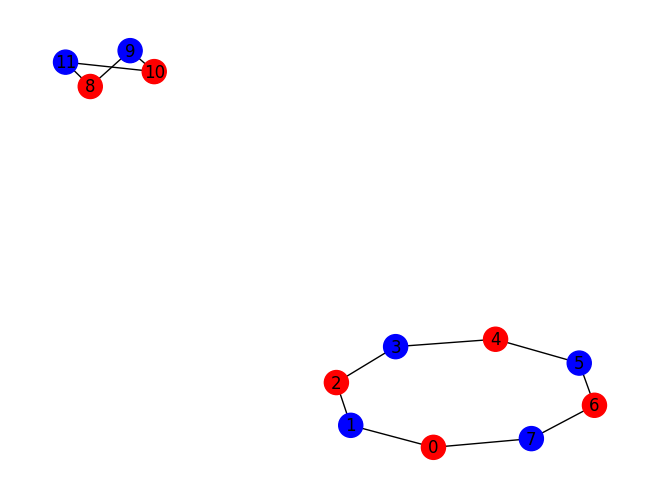

In [1]:
import networkx as nx

# Create two cycle graphs
G1 = nx.cycle_graph(8)
G2 = nx.cycle_graph(4)

# Relabel nodes in G2 to avoid overlap
G2 = nx.relabel_nodes(G2, lambda x: x + 8)

# Combine the two graphs
G = nx.compose(G1, G2)

# Assign alternating labels {-1, 1}
labels = {}
for node in G.nodes():
    # Alternate starting with -1 for even index, 1 for odd index
    labels[node] = -1 if node % 2 == 0 else 1

nx.set_node_attributes(G, labels, "label")

# Draw the graph with node colors based on label
import matplotlib.pyplot as plt

color_map = ['red' if labels[node] == -1 else 'blue' for node in G.nodes()]
nx.draw(G, with_labels=True, node_color=color_map)
plt.show()

In [7]:
from env import FJOpinionDynamics
import itertools
import copy

min_polarization = None
best_edge = None
best_graph = None

nodes = list(G.nodes())
labels = [labels[node] for node in nodes]
for u, v in itertools.combinations(nodes, 2):
    G_mod = copy.deepcopy(G)
    if G_mod.has_edge(u, v):
        G_mod.remove_edge(u, v)
    else:
        G_mod.add_edge(u, v)
    pol = FJOpinionDynamics.polarization(G_mod, labels)
    print(f"Modified edge ({u}, {v}): Polarization = {pol}")
    if min_polarization is None or pol < min_polarization:
        min_polarization = pol
        best_edge = (u, v)
        best_graph = G_mod

print(f"Best edge to modify: {best_edge}")
print(f"Minimum polarization: {min_polarization}")


Modified edge (0, 1): Polarization = 0.7647985513807152
Modified edge (0, 2): Polarization = 0.4800000000000001
Modified edge (0, 3): Polarization = 0.46518940105774653
Modified edge (0, 4): Polarization = 0.4800000000000001
Modified edge (0, 5): Polarization = 0.46518940105774664
Modified edge (0, 6): Polarization = 0.48
Modified edge (0, 7): Polarization = 0.7647985513807154
Modified edge (0, 8): Polarization = 0.4800000000000001
Modified edge (0, 9): Polarization = 0.4721348481473232
Modified edge (0, 10): Polarization = 0.4800000000000003
Modified edge (0, 11): Polarization = 0.4721348481473232
Modified edge (1, 2): Polarization = 0.7647985513807152
Modified edge (1, 3): Polarization = 0.4800000000000001
Modified edge (1, 4): Polarization = 0.46518940105774653
Modified edge (1, 5): Polarization = 0.48
Modified edge (1, 6): Polarization = 0.4651894010577464
Modified edge (1, 7): Polarization = 0.4800000000000001
Modified edge (1, 8): Polarization = 0.47213484814732315
Modified edge 

In [6]:
G.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11))

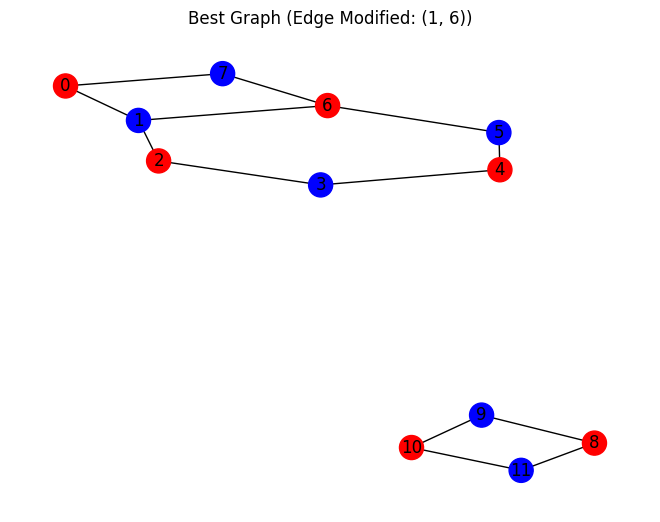

In [4]:
import matplotlib.pyplot as plt

# Visualize the best_graph with node colors based on labels
nx.draw(best_graph, with_labels=True, node_color=color_map)
plt.title(f"Best Graph (Edge Modified: {best_edge})")
plt.show()

In [7]:
import numpy as np
import networkx as nx

G = nx.cycle_graph(8)
G.remove_edge(0, 7)
G.remove_edge(3, 4)
sigma = np.array([-1 if i % 2 == 0 else 1 for i in range(8)])

L = nx.laplacian_matrix(G).toarray()

n = len(sigma)
J = np.ones((n, n)) / n

M = np.linalg.inv(L + J)





In [8]:
diag = np.diag(M)
# R = diag[:, None] + diag[None, :] - 2 * M
diag[:, None]

array([[9.00719925e+15],
       [9.00719925e+15],
       [9.00719925e+15],
       [9.00719925e+15],
       [9.00719925e+15],
       [9.00719925e+15],
       [9.00719925e+15],
       [9.00719925e+15]])

In [9]:
diag[:, None] + diag[None, :]- 2* M

array([[0.0000000e+00, 0.0000000e+00, 2.0000000e+00, 0.0000000e+00,
        3.6028797e+16, 3.6028797e+16, 3.6028797e+16, 3.6028797e+16],
       [0.0000000e+00, 0.0000000e+00, 2.0000000e+00, 2.0000000e+00,
        3.6028797e+16, 3.6028797e+16, 3.6028797e+16, 3.6028797e+16],
       [2.0000000e+00, 2.0000000e+00, 0.0000000e+00, 2.0000000e+00,
        3.6028797e+16, 3.6028797e+16, 3.6028797e+16, 3.6028797e+16],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        3.6028797e+16, 3.6028797e+16, 3.6028797e+16, 3.6028797e+16],
       [3.6028797e+16, 3.6028797e+16, 3.6028797e+16, 3.6028797e+16,
        0.0000000e+00, 2.0000000e+00, 4.0000000e+00, 6.0000000e+00],
       [3.6028797e+16, 3.6028797e+16, 3.6028797e+16, 3.6028797e+16,
        2.0000000e+00, 0.0000000e+00, 2.0000000e+00, 4.0000000e+00],
       [3.6028797e+16, 3.6028797e+16, 3.6028797e+16, 3.6028797e+16,
        2.0000000e+00, 0.0000000e+00, 0.0000000e+00, 2.0000000e+00],
       [3.6028797e+16, 3.6028797e+16, 3.6

In [10]:
M

array([[ 9.00719925e+15,  9.00719925e+15,  9.00719925e+15,
         9.00719925e+15, -9.00719925e+15, -9.00719925e+15,
        -9.00719925e+15, -9.00719925e+15],
       [ 9.00719925e+15,  9.00719925e+15,  9.00719925e+15,
         9.00719925e+15, -9.00719925e+15, -9.00719925e+15,
        -9.00719925e+15, -9.00719925e+15],
       [ 9.00719925e+15,  9.00719925e+15,  9.00719925e+15,
         9.00719925e+15, -9.00719925e+15, -9.00719925e+15,
        -9.00719925e+15, -9.00719925e+15],
       [ 9.00719925e+15,  9.00719925e+15,  9.00719925e+15,
         9.00719925e+15, -9.00719925e+15, -9.00719925e+15,
        -9.00719925e+15, -9.00719925e+15],
       [-9.00719925e+15, -9.00719925e+15, -9.00719925e+15,
        -9.00719925e+15,  9.00719925e+15,  9.00719925e+15,
         9.00719925e+15,  9.00719925e+15],
       [-9.00719925e+15, -9.00719925e+15, -9.00719925e+15,
        -9.00719925e+15,  9.00719925e+15,  9.00719925e+15,
         9.00719925e+15,  9.00719925e+15],
       [-9.00719925e+15, -9.007199

In [5]:
L = nx.laplacian_matrix(G).toarray()
I = np.eye(L.shape[0])
influence_matrix = np.linalg.inv(I + L)
influence_matrix

array([[0.44761905, 0.17142857, 0.06666667, 0.02857143, 0.01904762,
        0.02857143, 0.06666667, 0.17142857],
       [0.17142857, 0.44761905, 0.17142857, 0.06666667, 0.02857143,
        0.01904762, 0.02857143, 0.06666667],
       [0.06666667, 0.17142857, 0.44761905, 0.17142857, 0.06666667,
        0.02857143, 0.01904762, 0.02857143],
       [0.02857143, 0.06666667, 0.17142857, 0.44761905, 0.17142857,
        0.06666667, 0.02857143, 0.01904762],
       [0.01904762, 0.02857143, 0.06666667, 0.17142857, 0.44761905,
        0.17142857, 0.06666667, 0.02857143],
       [0.02857143, 0.01904762, 0.02857143, 0.06666667, 0.17142857,
        0.44761905, 0.17142857, 0.06666667],
       [0.06666667, 0.02857143, 0.01904762, 0.02857143, 0.06666667,
        0.17142857, 0.44761905, 0.17142857],
       [0.17142857, 0.06666667, 0.02857143, 0.01904762, 0.02857143,
        0.06666667, 0.17142857, 0.44761905]])

In [6]:
runs = {}
runs["GraphSage-complex-n200-k0-hd64-layers4-lr0.0001-heads0-bs64-p1-g0.5-tuf2000-1XFVM-g"] = {
    "gnn": "GraphSage",
    "qnet": "complex",
    "learning_rate": 0.0001,
    "embed_dim": 64,
    "num_layers": 4,
    "batch_size": 64,
    "gamma": 0.5,
    "num_heads": 4,
    "wandb_init": True,
    "reset_probability": 0.015,
    "parallel_envs": 1,
    "end_e": 0.4,
    "target_update_freq": 2000,
    "timesteps_train": 200000,
    "environment": "nonlinear",
    "start_states": "data/nonlinear/train/start_states_off2_train_n200_d6.pt",
    "n": 200,
    "average_degree": 6,
    "n_edge_updates_per_step": 5,
    "keep_spd_matrix": False,
    "keep_influence_matrix": False,
    "k": 15
}

runs["GraphSage-complex-n200-k0-hd64-layers4-lr0.0001-heads0-bs64-p1-g0.5-tuf4000-5C87J-gg"] = {
    "gnn": "GraphSage",
    "qnet": "complex",
    "learning_rate": 0.0001,
    "embed_dim": 64,
    "num_layers": 4,
    "batch_size": 64,
    "gamma": 0.5,
    "num_heads": 4,
    "wandb_init": True,
    "reset_probability": 0.015,
    "parallel_envs": 1,
    "end_e": 0.4,
    "target_update_freq": 4000,
    "timesteps_train": 200000,
    "environment": "nonlinear",
    "start_states": "data/nonlinear/train/start_states_off_train_n200_d6.pt",
    "n": 200,
    "average_degree": 6,
    "n_edge_updates_per_step": 5,
    "keep_spd_matrix": False,
    "keep_influence_matrix": False,
    "k": 15
}

runs["GraphSage-complex-n200-k0-hd64-layers4-lr0.0001-heads0-bs64-p1-g0.5-tuf4000-C1AR8-g"] = {
    "gnn": "GraphSage",
    "qnet": "complex",
    "learning_rate": 0.0001,
    "embed_dim": 64,
    "num_layers": 4,
    "batch_size": 64,
    "gamma": 0.5,
    "num_heads": 4,
    "wandb_init": True,
    "reset_probability": 0.015,
    "parallel_envs": 1,
    "end_e": 0.4,
    "target_update_freq": 4000,
    "timesteps_train": 200000,
    "environment": "nonlinear",
    "start_states": "data/nonlinear/train/start_states_off2_train_n200_d6.pt",
    "n": 200,
    "average_degree": 6,
    "n_edge_updates_per_step": 5,
    "keep_spd_matrix": False,
    "keep_influence_matrix": False,
    "k": 15
}

runs["GraphSage-complex-n200-k0-hd64-layers4-lr0.0001-heads0-bs64-p1-g0.5-tuf4000-CERC2-g"] = {
    "gnn": "GraphSage",
    "qnet": "complex",
    "learning_rate": 0.0001,
    "embed_dim": 64,
    "num_layers": 4,
    "batch_size": 64,
    "gamma": 0.5,
    "num_heads": 4,
    "wandb_init": True,
    "reset_probability": 0.02,
    "parallel_envs": 1,
    "end_e": 0.4,
    "target_update_freq": 4000,
    "timesteps_train": 200000,
    "environment": "nonlinear",
    "start_states": "data/nonlinear/train/start_states_off_train_n200_d6.pt",
    "n": 200,
    "average_degree": 6,
    "n_edge_updates_per_step": 5,
    "keep_spd_matrix": False,
    "keep_influence_matrix": False,
    "k": 15
}

runs["GraphSage-complex-n200-k0-hd64-layers4-lr0.0001-heads0-bs64-p1-g0.5-tuf4000-DUR5B-g"] = {
    "gnn": "GraphSage",
    "qnet": "complex",
    "learning_rate": 0.0001,
    "embed_dim": 64,
    "num_layers": 4,
    "batch_size": 64,
    "gamma": 0.5,
    "num_heads": 4,
    "wandb_init": True,
    "reset_probability": 0.01,
    "parallel_envs": 1,
    "end_e": 0.4,
    "target_update_freq": 4000,
    "timesteps_train": 200000,
    "environment": "nonlinear",
    "start_states": "data/nonlinear/train/start_states_off_train_n200_d6_old.pt",
    "n": 200,
    "average_degree": 6,
    "n_edge_updates_per_step": 5,
    "keep_spd_matrix": False,
    "keep_influence_matrix": False,
    "k": 15
}

runs["GraphSage-complex-n200-k0-hd64-layers5-lr0.0001-heads0-bs64-p1-g0.5-tuf4000-706OV-g"] = {
    "gnn": "GraphSage",
    "qnet": "complex",
    "learning_rate": 0.0001,
    "embed_dim": 64,
    "num_layers": 5,
    "batch_size": 64,
    "gamma": 0.5,
    "num_heads": 4,
    "wandb_init": True,
    "reset_probability": 0.001,
    "parallel_envs": 1,
    "end_e": 0.4,
    "target_update_freq": 4000,
    "timesteps_train": 200000,
    "environment": "nonlinear",
    "start_states": "data/nonlinear/train/start_states_off2_train_n200_d6.pt",
    "n": 200,
    "average_degree": 6,
    "n_edge_updates_per_step": 5,
    "keep_spd_matrix": False,
    "keep_influence_matrix": False,
    "k": 15
}

runs["GraphSage-complex-n200-k0-hd64-layers4-lr0.0001-heads0-bs64-p1-g0.5-tuf4000-5DDNH-gn"] = {
    "gnn": "GraphSage",
    "qnet": "complex",
    "learning_rate": 0.0001,
    "embed_dim": 64,
    "num_layers": 4,
    "batch_size": 64,
    "gamma": 0.5,
    "num_heads": 4,
    "wandb_init": True,
    "reset_probability": 0.015,
    "parallel_envs": 1,
    "end_e": 0.4,
    "train_freq": 8,
    "target_update_freq": 4000,
    "timesteps_train": 400000,
    "environment": "nonlinear",
    "start_states": "data/nonlinear/train/start_states_off3_train_n200_d6.pt",
    "n": 200,
    "average_degree": 6,
    "n_edge_updates_per_step": 5,
    "keep_spd_matrix": False,
    "keep_influence_matrix": False,
    "k": 15
}

runs["GraphSage-complex-n200-k0-hd64-layers4-lr0.0001-heads0-bs64-p1-g0.5-tuf4000-O9OND-gn"] = {
    "gnn": "GraphSage",
    "qnet": "complex",
    "learning_rate": 0.0001,
    "embed_dim": 64,
    "num_layers": 4,
    "batch_size": 64,
    "gamma": 0.5,
    "num_heads": 4,
    "wandb_init": True,
    "reset_probability": 0.015,
    "parallel_envs": 1,
    "end_e": 0.4,
    "train_freq": 8,
    "target_update_freq": 4000,
    "timesteps_train": 400000,
    "environment": "nonlinear",
    "start_states": "data/nonlinear/train/start_states_off2_train_n200_d6.pt",
    "n": 200,
    "average_degree": 6,
    "n_edge_updates_per_step": 5,
    "keep_spd_matrix": False,
    "keep_influence_matrix": False,
    "k": 15
}

runs["GraphSage-complex-n200-k0-hd64-layers4-lr0.0001-heads0-bs64-p1-g0.5-tuf5000-ANJMZ-gn"] = {
    "gnn": "GraphSage",
    "qnet": "complex",
    "learning_rate": 0.0001,
    "embed_dim": 64,
    "num_layers": 4,
    "batch_size": 64,
    "gamma": 0.5,
    "num_heads": 4,
    "wandb_init": True,
    "reset_probability": 0.015,
    "parallel_envs": 1,
    "end_e": 0.4,
    "train_freq": 10,
    "target_update_freq": 5000,
    "timesteps_train": 500000,
    "environment": "nonlinear",
    "start_states": "data/nonlinear/train/start_states_off3_train_n200_d6.pt",
    "n": 200,
    "average_degree": 6,
    "n_edge_updates_per_step": 5,
    "keep_spd_matrix": False,
    "keep_influence_matrix": False,
    "k": 15
}

runs["GraphSage-complex-n200-k0-hd64-layers4-lr0.0001-heads0-bs128-p1-g0.5-tuf4000-CQP6O-gn"] = {
    "gnn": "GraphSage",
    "qnet": "complex",
    "learning_rate": 0.0001,
    "embed_dim": 64,
    "num_layers": 4,
    "batch_size": 128,
    "gamma": 0.5,
    "num_heads": 4,
    "wandb_init": True,
    "reset_probability": 0.015,
    "parallel_envs": 1,
    "end_e": 0.4,
    "train_freq": 8,
    "target_update_freq": 4000,
    "timesteps_train": 400000,
    "environment": "nonlinear",
    "start_states": "data/nonlinear/train/start_states_off3_train_n200_d6.pt",
    "n": 200,
    "average_degree": 6,
    "n_edge_updates_per_step": 5,
    "keep_spd_matrix": False,
    "keep_influence_matrix": False,
    "k": 15
}

In [9]:
import pandas as pd

# Extract column headers from last 7 letters of each key
columns = [key[-7:] for key in runs.keys()]

# Extract all unique row labels from all inner dictionaries
row_labels = sorted(set().union(*[d.keys() for d in runs.values()]))

# Build the data for the DataFrame
data = []
for row in row_labels:
    data.append([runs[key].get(row, None) for key in runs.keys()])

df = pd.DataFrame(data, index=row_labels, columns=columns)
df

,1XFVM-g,C87J-gg,C1AR8-g,CERC2-g,DUR5B-g,706OV-g,DDNH-gn,9OND-gn,NJMZ-gn,QP6O-gn
average_degree,6,6,6,6,6,6,6,6,6,6
batch_size,64,64,64,64,64,64,64,64,64,128
embed_dim,64,64,64,64,64,64,64,64,64,64
end_e,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4
environment,nonlinear,nonlinear,nonlinear,nonlinear,nonlinear,nonlinear,nonlinear,nonlinear,nonlinear,nonlinear
gamma,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
gnn,GraphSage,GraphSage,GraphSage,GraphSage,GraphSage,GraphSage,GraphSage,GraphSage,GraphSage,GraphSage
k,15,15,15,15,15,15,15,15,15,15
keep_influence_matrix,False,False,False,False,False,False,False,False,False,False
keep_spd_matrix,False,False,False,False,False,False,False,False,False,False


In [5]:
from env import NLOpinionDynamics

env_nl = NLOpinionDynamics(start_states="data/nonlinear/train/start_states_off_5_train_n150_d6.pt", n=150, average_degree=6, keep_influence_matrix=True)



0.17318124995634646


In [9]:
state = env_nl.reset()

0.1465465638671785


In [20]:
env_nl.keep_influence_matrix = True

In [18]:
new_state, _, _ = env_nl.step(state=new_state, action=0)

0.14655967420867935


In [16]:
new_state["influence_matrix"]

array([[0.1465634 , 0.00480218, 0.02435568, ..., 0.00783759, 0.00098549,
        0.0046845 ],
       [0.00480218, 0.16737014, 0.00454828, ..., 0.00436011, 0.00086855,
        0.00418134],
       [0.02435568, 0.00454828, 0.12165719, ..., 0.00505247, 0.00107604,
        0.00463795],
       ...,
       [0.00783759, 0.00436011, 0.00505247, ..., 0.12972287, 0.00125045,
        0.00649866],
       [0.00098549, 0.00086855, 0.00107604, ..., 0.00125045, 0.38519987,
        0.0015673 ],
       [0.0046845 , 0.00418134, 0.00463795, ..., 0.00649866, 0.0015673 ,
        0.09992058]], shape=(150, 150))

In [1]:
from env import FJOpinionDynamics

env = FJOpinionDynamics(start_states="data/friedkin-johnson/train/start_states_train_n100_d6.pt", n=100, average_degree=6, k=1)

In [2]:
state = env.reset()

state["edges_left"]

1

In [12]:
def parameters_graph_sage(layers, embed_dim):
    return (9+layers)*embed_dim + (2 * layers) * embed_dim **2 + 5*embed_dim**2
def parameters_global(layers, embed_dim):
    return (10+layers)*embed_dim + (3 * layers) * embed_dim **2
def parameters_graphormer_simple(layers, embed_dim):
    return (6+3*layers) * embed_dim + (6 * layers+1) * embed_dim **2

In [21]:
import torch
from agents.dqn import GNN_REGISTRY, QNET_REGISTRY

embed_dim = 128
layers = 4
gnn_architectures = ["GraphSage", "Global", "Graphormer", "GCN"]
dqn_architectures = ["simple", "complex"]

for gnn in gnn_architectures:
    for dqn in dqn_architectures:
        model = GNN_REGISTRY[gnn](embed_dim=embed_dim, num_layers=layers)  # your model
        model_total = QNET_REGISTRY[dqn](model)  # your model

        # Total number of parameters
        total_params = sum(p.numel() for p in model_total.parameters())
        print(f"Total parameters {gnn}-{dqn}:", total_params)

        # Optional: total trainable parameters only
        trainable_params = sum(p.numel() for p in model_total.parameters() if p.requires_grad)
        print(f"Trainable parameters {gnn}-{dqn}:", trainable_params)


Total parameters GraphSage-simple: 149121
Trainable parameters GraphSage-simple: 149121
Total parameters GraphSage-complex: 214914
Trainable parameters GraphSage-complex: 214914
Total parameters Global-simple: 215041
Trainable parameters Global-simple: 215041
Total parameters Global-complex: 280834
Trainable parameters Global-complex: 280834
Total parameters Graphormer-simple: 413969
Trainable parameters Graphormer-simple: 413969
Total parameters Graphormer-complex: 479762
Trainable parameters Graphormer-complex: 479762
Total parameters GCN-simple: 83201
Trainable parameters GCN-simple: 83201
Total parameters GCN-complex: 148994
Trainable parameters GCN-complex: 148994


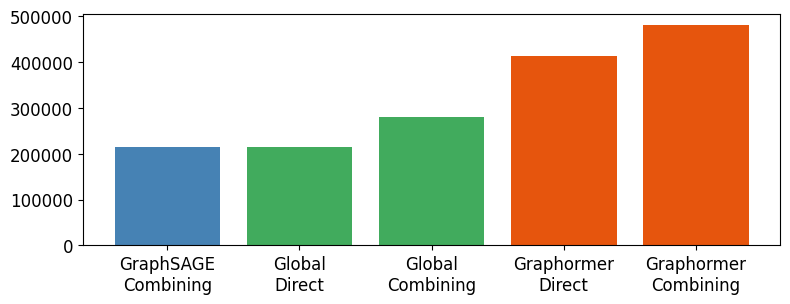

In [15]:
import matplotlib.pyplot as plt

# Data for the bar plot
parameter_names = ['GraphSAGE\nCombining', 'Global\nDirect', 'Global\nCombining', 'Graphormer\nDirect', 'Graphormer\nCombining']
parameter_values = [214914, 215041, 280834, 413969, 479762]
# Create the bar plot
plt.figure(figsize=(9, 3))
plt.bar(
    parameter_names,
    parameter_values,
    color=[
        'steelblue',   # Bar 1: distinct
        "#41ab5d",     # Bar 2: Group A (light green)
        '#41ab5d',     # Bar 3: Group A (darker green)
        '#e6550d',     # Bar 4: Group B (light orange)
        '#e6550d'      # Bar 5: Group B (darker orange)
    ]
)
# plt.xlabel('Model', fontsize=12)
# plt.ylabel('Number of Parameters', fontsize=12)
# plt.title('Comparison of Model Parameters', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

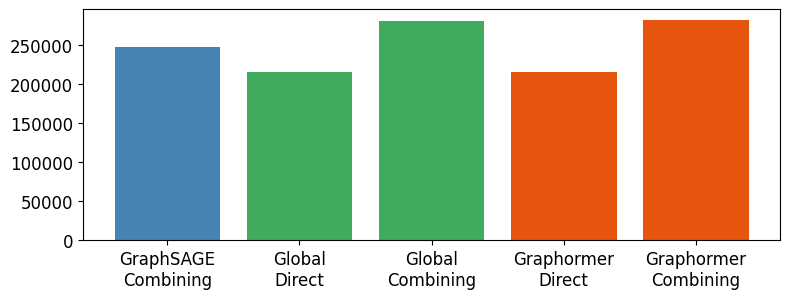

In [20]:
import matplotlib.pyplot as plt

# Data for the bar plot
parameter_names = ['GraphSAGE\nCombining', 'Global\nDirect', 'Global\nCombining', 'Graphormer\nDirect', 'Graphormer\nCombining']
parameter_values = [247810, 215041, 280834, 215561, 281354]
# Create the bar plot
plt.figure(figsize=(9, 3))
plt.bar(
    parameter_names,
    parameter_values,
    color=[
        'steelblue',   # Bar 1: distinct
        "#41ab5d",     # Bar 2: Group A (light green)
        '#41ab5d',     # Bar 3: Group A (darker green)
        '#e6550d',     # Bar 4: Group B (light orange)
        '#e6550d'      # Bar 5: Group B (darker orange)
    ]
)
# plt.xlabel('Model', fontsize=12)
# plt.ylabel('Number of Parameters', fontsize=12)
# plt.title('Comparison of Model Parameters', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [6]:
from visualization import (
    visualize_dqn_vs_greedy_ood_n,
    visualize_dqn_vs_greedy_ood_n_simple,
    visualize_variance_ood_n_simple,
    visualize_dqn_vs_greedy,
    performance_overview,
)

run_name = "GraphSage-complex-n150-k15-hd128-layers4-lr0.0004-heads0-bs64-p1-g1.0-tuf100000-4YDJXoneedge"
folder = "test"
visualize_dqn_vs_greedy(run_name, folder=folder)
visualize_dqn_vs_greedy_ood_n(run_name, folder=folder)
visualize_dqn_vs_greedy_ood_n_simple(run_name, folder=folder)
performance_overview(run_name, folder=folder)
# visualize_variance_ood_n_simple(run_name, folder=folder)

In [17]:
import json
import os
import torch
from evaluation import depolarize_random_strategy
from env import FJOpinionDynamics

def evaluate_dqn_policy_vs_greedy_ood_n_single_run(
    n_values, k_values, folder="test"
):
    """
    Helper function of evaluate_dqn_policy_vs_greedy_ood_n.
    """

    evaluation_dir = os.path.join(
        "data", "friedkin-johnson", "greedy_solutions", folder
    )


    results = {}
    for n in n_values:
        for k in k_values:
            with open(
                os.path.join(
                    evaluation_dir,
                    f"greedy_solutions_n{n}_d6_k{k}.pt",
                ),
                "rb",
            ) as f:
                greedy_solutions = torch.load(f, weights_only=False)
            polarization_avg = 0
            for state, greedy_solution in greedy_solutions:
                G = state["graph"]
                G_random = depolarize_random_strategy(
                    G, k=k
                )
                polarization = FJOpinionDynamics.polarization(G_random, state["sigma"])
                polarization_avg += polarization
            polarization_avg /= len(greedy_solutions)
            results[(n, k)] = {
                "number_states": len(greedy_solutions),
                "difference": polarization_avg,
            }
    return results

In [20]:
results = evaluate_dqn_policy_vs_greedy_ood_n_single_run(
    n_values=[100, 150, 200, 300, 400], k_values=[10, 15, 20, 25], folder="test"
)

In [26]:

avg = 0
total_states = 0
for key in results:
    avg += results[key]["difference"]
avg /= len(results)
results[(300, 15)]
# avg

{'number_states': 100, 'difference': np.float64(5.609949531237532)}

In [8]:
import pickle
import os

run_name = "Graphormer-complex-n10-k2-hd128-layers4-lr0.0004-heads4-bs64-p1-g1.0-tuf100000-5RVH9normal"
run_dir = os.path.join("results", "dqn", "friedkin-johnson", "runs", run_name)

with open(
        os.path.join(run_dir, f"evaluation_comparison_to_greedy_val.pkl"),
        "rb",
    ) as f:
        results_normal = pickle.load(f)

run_name = "Graphormer-complex-n10-k2-hd128-layers4-lr0.0004-heads4-bs64-p1-g1.0-tuf100000-T661Voneedge"
run_dir = os.path.join("results", "dqn", "friedkin-johnson", "runs", run_name)

with open(
        os.path.join(run_dir, "val", f"evaluation_comparison_to_greedy.pkl"),
        "rb",
    ) as f:
        results_oneedge = pickle.load(f)

In [9]:
print(results_normal[(10, 2)]["difference"]/100)

print(results_oneedge[(10, 2)]["difference"]/100)


2.3840270146413545e-05
7.538924496699462e-06


In [11]:
print(results_normal[(10, 2)])

{'number_states': 100, 'dqn_better': 4, 'greedy_better': 9, 'difference': np.float64(0.0023840270146413545)}


In [10]:
results_oneedge[(10, 2)]

{'number_states': 100,
 'dqn_better': 2,
 'greedy_better': 7,
 'difference': np.float64(0.0007538924496699462)}

In [17]:
from evaluation import evaluate_dqn_policy_vs_greedy
from visualization import visualize_dqn_vs_greedy, visualize_variance_ood_n

run_name = "Global-simple-n150-k15-hd128-layers4-lr0.0004-heads0-bs64-p1-g1.0-tuf100000-J4UMAoneedge"
folder = "test"
n = 400
k = 25
visualize_variance_ood_n(run_name, folder=folder)
# visualize_dqn_vs_greedy(run_name, folder=folder)

In [29]:
import torch

variances = [0.047 * 100, 0.07* 100, 0.042 * 100, 0.05 * 100]

torch.var(torch.tensor(variances)).item() / 10000

0.00015091668367385864

In [30]:
variances = [0.047, 0.07, 0.042, 0.05]

torch.var(torch.tensor(variances)).item()

0.0001509166759205982

In [9]:
import os
import pickle

run_dir = os.path.join("results", "dqn", "friedkin-johnson", "runs", run_name)

# with open(os.path.join(run_dir, "params_env.json"), "r") as f:
#     params_env = json.load(f)

with open(
    os.path.join(run_dir, f"evaluation_comparison_to_greedy_variance_{folder}.pkl"),
    "rb",
) as f:
    variances = pickle.load(f)

In [10]:
variances

{(100, 10): 0.003206844544812415,
 (100, 15): 0.012442452871775114,
 (100, 20): 0.03228907796083594,
 (100, 25): 0.0658295276502063,
 (150, 10): 0.008900290204406077,
 (150, 15): 0.01137587721787037,
 (150, 20): 0.00042457616802795957,
 (150, 25): 0.0014771881762260276,
 (200, 10): 0.12570303100386662,
 (200, 15): 0.021955207863934997,
 (200, 20): 0.04106016403930962,
 (200, 25): 0.0714264953498352,
 (300, 10): 5.206699002652881,
 (300, 15): 12.662867630013736,
 (300, 20): 16.039186196623245,
 (300, 25): 18.118367190582706,
 (400, 10): 221.23807028829725,
 (400, 15): 212.85274412617613,
 (400, 20): 147.95526630062977,
 (400, 25): 65.54545599530239}

In [12]:
for key in variances:
    print(f"{key}: {variances[key]}")

(100, 10): 0.003206844544812415
(100, 15): 0.012442452871775114
(100, 20): 0.03228907796083594
(100, 25): 0.0658295276502063
(150, 10): 0.008900290204406077
(150, 15): 0.01137587721787037
(150, 20): 0.00042457616802795957
(150, 25): 0.0014771881762260276
(200, 10): 0.12570303100386662
(200, 15): 0.021955207863934997
(200, 20): 0.04106016403930962
(200, 25): 0.0714264953498352
(300, 10): 5.206699002652881
(300, 15): 12.662867630013736
(300, 20): 16.039186196623245
(300, 25): 18.118367190582706
(400, 10): 221.23807028829725
(400, 15): 212.85274412617613
(400, 20): 147.95526630062977
(400, 25): 65.54545599530239
